In [ ]:
!nvidia-smi

In [ ]:
!pip install torchvision==0.9.1
!pip install tqdm


In [1]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.decomposition import PCA

In [2]:
train_on_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
nw = 0
bs = 64
vsize = 0.2

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

td = datasets.CIFAR10('data', train=True, download=True, transform=transform)
testd = datasets.CIFAR10('data', train=False, download=True, transform=transform)

tl = len(td)
i = list(range(tl))
np.random.shuffle(i)
split = int(np.floor(vsize * tl))
ti, vi = i[split:], i[:split]

training_data = SubsetRandomSampler(ti)
validation_data = SubsetRandomSampler(vi)

train_loader = torch.utils.data.DataLoader(td, batch_size=bs,
    sampler=training_data, num_workers=nw)
valid_loader = torch.utils.data.DataLoader(td, batch_size=bs, 
    sampler=validation_data, num_workers=nw)
test_loader = torch.utils.data.DataLoader(testd, batch_size=bs, 
    num_workers=nw)


classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
print('debug 2.....')


Files already downloaded and verified
Files already downloaded and verified
debug 2.....


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        # dropout
        self.dropout = nn.Dropout(p=.5)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flattening
        x = x.view(-1, 64 * 4 * 4)
        # fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [5]:
class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x
    
#parameters: 5852170

In [ ]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128,64)
    
    # Progresses data across layers    
    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = self.max_pool1(x)
        
        x = self.conv_layer3(x)
        x = self.conv_layer4(x)
        x = self.max_pool2(x)
                
        x = x.reshape(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        return x
    #parameters: 278752

In [ ]:
model3 = Model3()
if train_on_gpu:
  model3.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.01, weight_decay = 0.005, momentum = 0.9)
print(model2)

In [6]:
model1 = Net()
if train_on_gpu:
  model1.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01, weight_decay = 0.005, momentum = 0.9) 
print(model1)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [7]:
model2 = Net()
if train_on_gpu:
  model2.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01, weight_decay = 0.005, momentum = 0.9) 
print(model2)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [8]:
#train model1
train_losslist1 = []
grad_norm_list=[]
n_epochs = [*range(100)]
valid_loss_min = np.Inf 
plt.figure()
for epoch in range(1, len(n_epochs)+1):
    train_loss = 0.0
    valid_loss = 0.0
        
    model1.train()
    for data, target in train_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model1(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    model1.eval()
         
            
            
    grad_all=0.0
    for p in model1.parameters():
        #print('debug3')
        grad=0.0
        if p.grad is not None:
            #print('debug1')
            grad= (p.grad.cpu().data.numpy()**2).sum()
        grad_all+=grad
    grad_norm=grad_all**0.5
    #print('debug2')
    print(grad_norm)
    grad_norm_list.append(grad_norm)
    #plt.scatter(epoch,grad_norm)
        
    for data, target in valid_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model1(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist1.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
    epoch, train_loss, valid_loss))
        
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
        torch.save(model1.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss




plt.plot(n_epochs,grad_norm_list)
plt.ylabel("grad")
plt.show()
plt.plot(n_epochs, train_losslist1)
plt.xlabel("iteration")
plt.ylabel("losss")
plt.title("Model1")
plt.show()
#1.57

25.953899813792738
Epoch: 1 	Training Loss: 1.845692 	Validation Loss: 0.461335
Validation loss decreased (inf --> 0.461335).  Saving model ...
51.74531539961677
Epoch: 2 	Training Loss: 1.845722 	Validation Loss: 0.461335
Validation loss decreased (0.461335 --> 0.461335).  Saving model ...
76.97254052936303
Epoch: 3 	Training Loss: 1.845664 	Validation Loss: 0.461335
Validation loss decreased (0.461335 --> 0.461335).  Saving model ...
102.56835981432761


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

1.7623243997707587
Epoch: 1 	Training Loss: 1.696396 	Validation Loss: 0.352734
Validation loss decreased (inf --> 0.352734).  Saving model ...
2.632390435393771
Epoch: 2 	Training Loss: 1.381484 	Validation Loss: 0.305586
Validation loss decreased (0.352734 --> 0.305586).  Saving model ...
2.5061533936425255
Epoch: 3 	Training Loss: 1.245381 	Validation Loss: 0.279040
Validation loss decreased (0.305586 --> 0.279040).  Saving model ...
2.2410943952606837
Epoch: 4 	Training Loss: 1.142084 	Validation Loss: 0.251930
Validation loss decreased (0.279040 --> 0.251930).  Saving model ...
2.343968820887103
Epoch: 5 	Training Loss: 1.065599 	Validation Loss: 0.240827
Validation loss decreased (0.251930 --> 0.240827).  Saving model ...
2.2658219297094355
Epoch: 6 	Training Loss: 1.010192 	Validation Loss: 0.233045
Validation loss decreased (0.240827 --> 0.233045).  Saving model ...
3.5298852687342315
Epoch: 7 	Training Loss: 0.962371 	Validation Loss: 0.210755
Validation loss decreased (0.2330

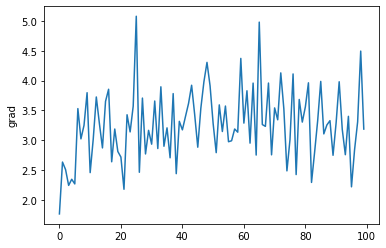

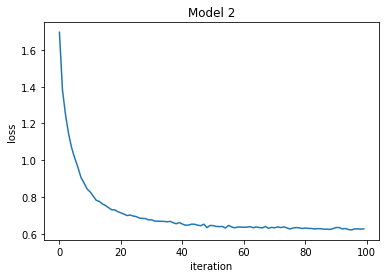

In [9]:
#train model2
n_epochs = [*range(100)]
train_losslist2 = []
grad_norm_list = []
valid_loss_min = np.Inf

for epoch in range(1, len(n_epochs)+1):

   
    train_loss = 0.0
    valid_loss = 0.0
    
    model2.train()
    for data, target in train_loader:
        
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        optimizer.zero_grad()
        output = model2(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    model2.eval()
    
    
    
    #----------------------Gradient Norm--------------------------------------------------
    grad_all=0.0
    for p in model2.parameters():
        #print('debug3')
        grad=0.0
        if p.grad is not None:
            #print('debug1')
            grad= (p.grad.cpu().data.numpy()**2).sum()
        grad_all+=grad
    grad_norm=grad_all**0.5
    #print('debug2')
    print(grad_norm)
    grad_norm_list.append(grad_norm)
    #----------------------Gradient Norm--------------------------------------------------
    
    
    for data, target in valid_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model2(data)
        loss = criterion(output, target) 
        valid_loss += loss.item()*data.size(0)
    
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist2.append(train_loss)
         
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
   
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model2.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
plt.plot(n_epochs,grad_norm_list)
plt.ylabel("grad")
plt.show()
plt.plot(n_epochs, train_losslist2)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Model 2")
plt.show()

#1.87

Epoch: 1 	Training Loss: 1.945201 	Validation Loss: 0.388433
Validation loss decreased (inf --> 0.388433).  Saving model ...
Epoch: 2 	Training Loss: 1.461714 	Validation Loss: 0.347513
Validation loss decreased (0.388433 --> 0.347513).  Saving model ...
Epoch: 3 	Training Loss: 1.288091 	Validation Loss: 0.310006
Validation loss decreased (0.347513 --> 0.310006).  Saving model ...
Epoch: 4 	Training Loss: 1.196558 	Validation Loss: 0.291801
Validation loss decreased (0.310006 --> 0.291801).  Saving model ...
Epoch: 5 	Training Loss: 1.134428 	Validation Loss: 0.279570
Validation loss decreased (0.291801 --> 0.279570).  Saving model ...
Epoch: 6 	Training Loss: 1.082710 	Validation Loss: 0.271851
Validation loss decreased (0.279570 --> 0.271851).  Saving model ...
Epoch: 7 	Training Loss: 1.041430 	Validation Loss: 0.267854
Validation loss decreased (0.271851 --> 0.267854).  Saving model ...
Epoch: 8 	Training Loss: 1.003196 	Validation Loss: 0.262988
Validation loss decreased (0.26785

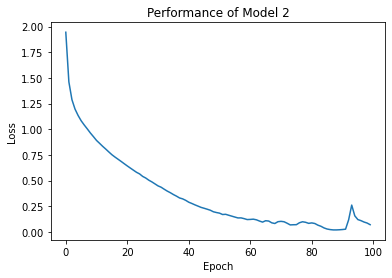

In [44]:
# train model 3
n_epochs = [*range(100)]
#List to store loss to visualize
train_losslist3 = []
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, len(n_epochs)+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model3.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model3.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losslist3.append(train_loss)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model3.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
plt.plot(n_epochs, train_losslist3)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 3")
plt.show()

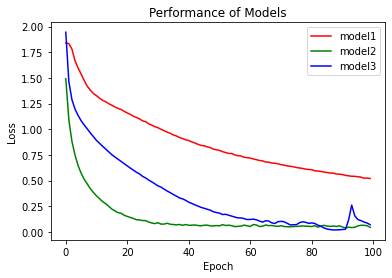

In [46]:
plt.plot(n_epochs, train_losslist1,color='r', label='model1')
plt.plot(n_epochs, train_losslist2,color='g', label='model2')
plt.plot(n_epochs, train_losslist3,color='b', label='model3')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Models")
plt.legend()
plt.show()